In [2]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil

from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(0,1))
pts = PowerTransformer()
scaler = StandardScaler()

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN
from sklearn.decomposition import PCA

In [3]:
gdf = gpd.read_file(f"zip://Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.zip/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34753 entries, 0 to 34752
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    34753 non-null  int64   
 1   lsoa11cd    34753 non-null  object  
 2   lsoa11nm    34753 non-null  object  
 3   lsoa11nmw   34753 non-null  object  
 4   st_areasha  34753 non-null  float64 
 5   st_lengths  34753 non-null  float64 
 6   geometry    34753 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df = pd.read_excel('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833978/File_5_-_IoD2019_Scores.xlsx',sheet_name = 'IoD2019 Scores')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   LSOA code (2011)                                                  32844 non-null  object 
 1   LSOA name (2011)                                                  32844 non-null  object 
 2   Local Authority District code (2019)                              32844 non-null  object 
 3   Local Authority District name (2019)                              32844 non-null  object 
 4   Index of Multiple Deprivation (IMD) Score                         32844 non-null  float64
 5   Income Score (rate)                                               32844 non-null  float64
 6   Employment Score (rate)                                           32844 non-null  float64
 7   Education, Skills and Training 

In [6]:
df = df[['LSOA code (2011)','Income Score (rate)','Employment Score (rate)','Education, Skills and Training Score','Health Deprivation and Disability Score',
         'Crime Score','Barriers to Housing and Services Score','Living Environment Score']]

In [7]:
df.columns = ['LSOAcode','Income','Employment', 'Education','Health','Crime','Access','Environment']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LSOAcode     32844 non-null  object 
 1   Income       32844 non-null  float64
 2   Employment   32844 non-null  float64
 3   Education    32844 non-null  float64
 4   Health       32844 non-null  float64
 5   Crime        32844 non-null  float64
 6   Access       32844 non-null  float64
 7   Environment  32844 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.0+ MB


In [8]:
pd.isnull(df).sum() > 0

LSOAcode       False
Income         False
Employment     False
Education      False
Health         False
Crime          False
Access         False
Environment    False
dtype: bool

In [9]:
ppd = pd.merge(gdf, df, left_on='lsoa11cd', right_on='LSOAcode', how='inner').reset_index()
ppd.shape
ppd.sample(3)

index  objectid   lsoa11cd             lsoa11nm            lsoa11nmw  \
1140    1140      1141  E01001159         Croydon 002C         Croydon 002C   
26830  26830     26831  E01027540  Northumberland 013B  Northumberland 013B   
7703    7703      7704  E01007909       Sheffield 032C       Sheffield 032C   

         st_areasha    st_lengths  \
1140   4.020397e+05   5099.292775   
26830  4.416739e+06  11188.090839   
7703   9.888028e+05   5505.803680   

                                                geometry   LSOAcode  Income  \
1140   POLYGON ((-0.09804 51.41919, -0.09658 51.41859...  E01001159   0.093   
26830  POLYGON ((-1.57833 55.20311, -1.57402 55.20193...  E01027540   0.341   
7703   POLYGON ((-1.37985 53.38110, -1.37664 53.37890...  E01007909   0.096   

       Employment  Education  Health  Crime  Access  Environment  
1140        0.053      6.753  -0.687  0.186  35.731       21.627  
26830       0.261     54.470   1.677  1.470  27.058        2.717  
7703        0.071     17.394   0.194  0.869  10.262       30.559

In [10]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

In [11]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

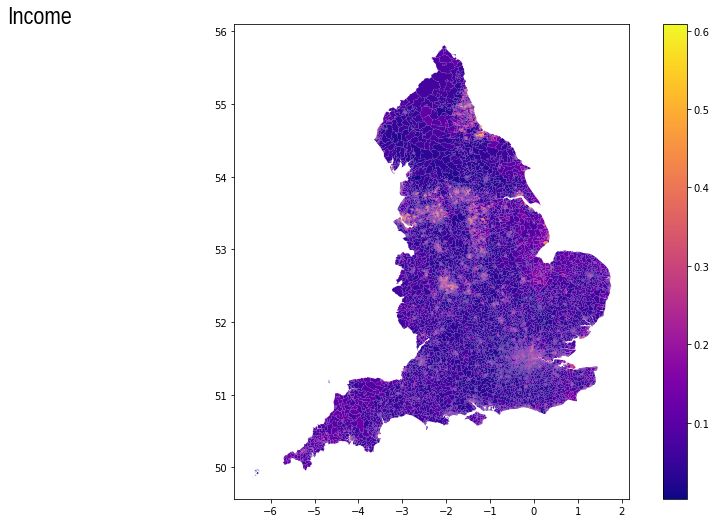

In [34]:
f = plt.figure()
f.set_size_inches(12,8)

ax1 = f.add_subplot()
ppd.plot(column='Income', legend=True, cmap='plasma', figsize=(12,7), ax=ax1)

f.subplots_adjust(top=0.95)
f.suptitle(f"Income", x=0.025, size=24, **tfont);

In [14]:
ppd = ppd[['lsoa11cd','lsoa11nm','geometry','Income','Employment', 'Education','Health','Crime','Access','Environment']].copy()
ppd.head()

lsoa11cd                   lsoa11nm  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            geometry  Income  Employment  \
0  POLYGON ((-0.09726 51.52158, -0.09649 51.52028...   0.007       0.010   
1  POLYGON ((-0.08810 51.51941, -0.08927 51.51752...   0.034       0.027   
2  POLYGON ((-0.09676 51.52325, -0.09644 51.52282...   0.086       0.086   
3  POLYGON ((-0.07320 51.51000, -0.07551 51.50974...   0.211       0.136   
4  POLYGON ((0.09118 51.53909, 0.09328 51.53787, ...   0.117       0.059   

   Education  Health  Crime  Access  Environment  
0      0.024  -1.654 -2.012  29.472       31.873  
1      0.063  -1.115 -2.343  24.412       23.084  
2      5.804  -0.102 -1.032  40.103       40.535  
3     22.260  -0.121 -1.317  39.900       28.979  
4     14.798  -0.359 -0.147  45.171       26.888

In [15]:
to_cluster = ppd[['lsoa11cd','Income','Employment', 'Education','Health','Crime','Access','Environment']].set_index('lsoa11cd').copy()
to_cluster.head()

Income  Employment  Education  Health  Crime  Access  Environment
lsoa11cd                                                                    
E01000001   0.007       0.010      0.024  -1.654 -2.012  29.472       31.873
E01000002   0.034       0.027      0.063  -1.115 -2.343  24.412       23.084
E01000003   0.086       0.086      5.804  -0.102 -1.032  40.103       40.535
E01000005   0.211       0.136     22.260  -0.121 -1.317  39.900       28.979
E01000006   0.117       0.059     14.798  -0.359 -0.147  45.171       26.888

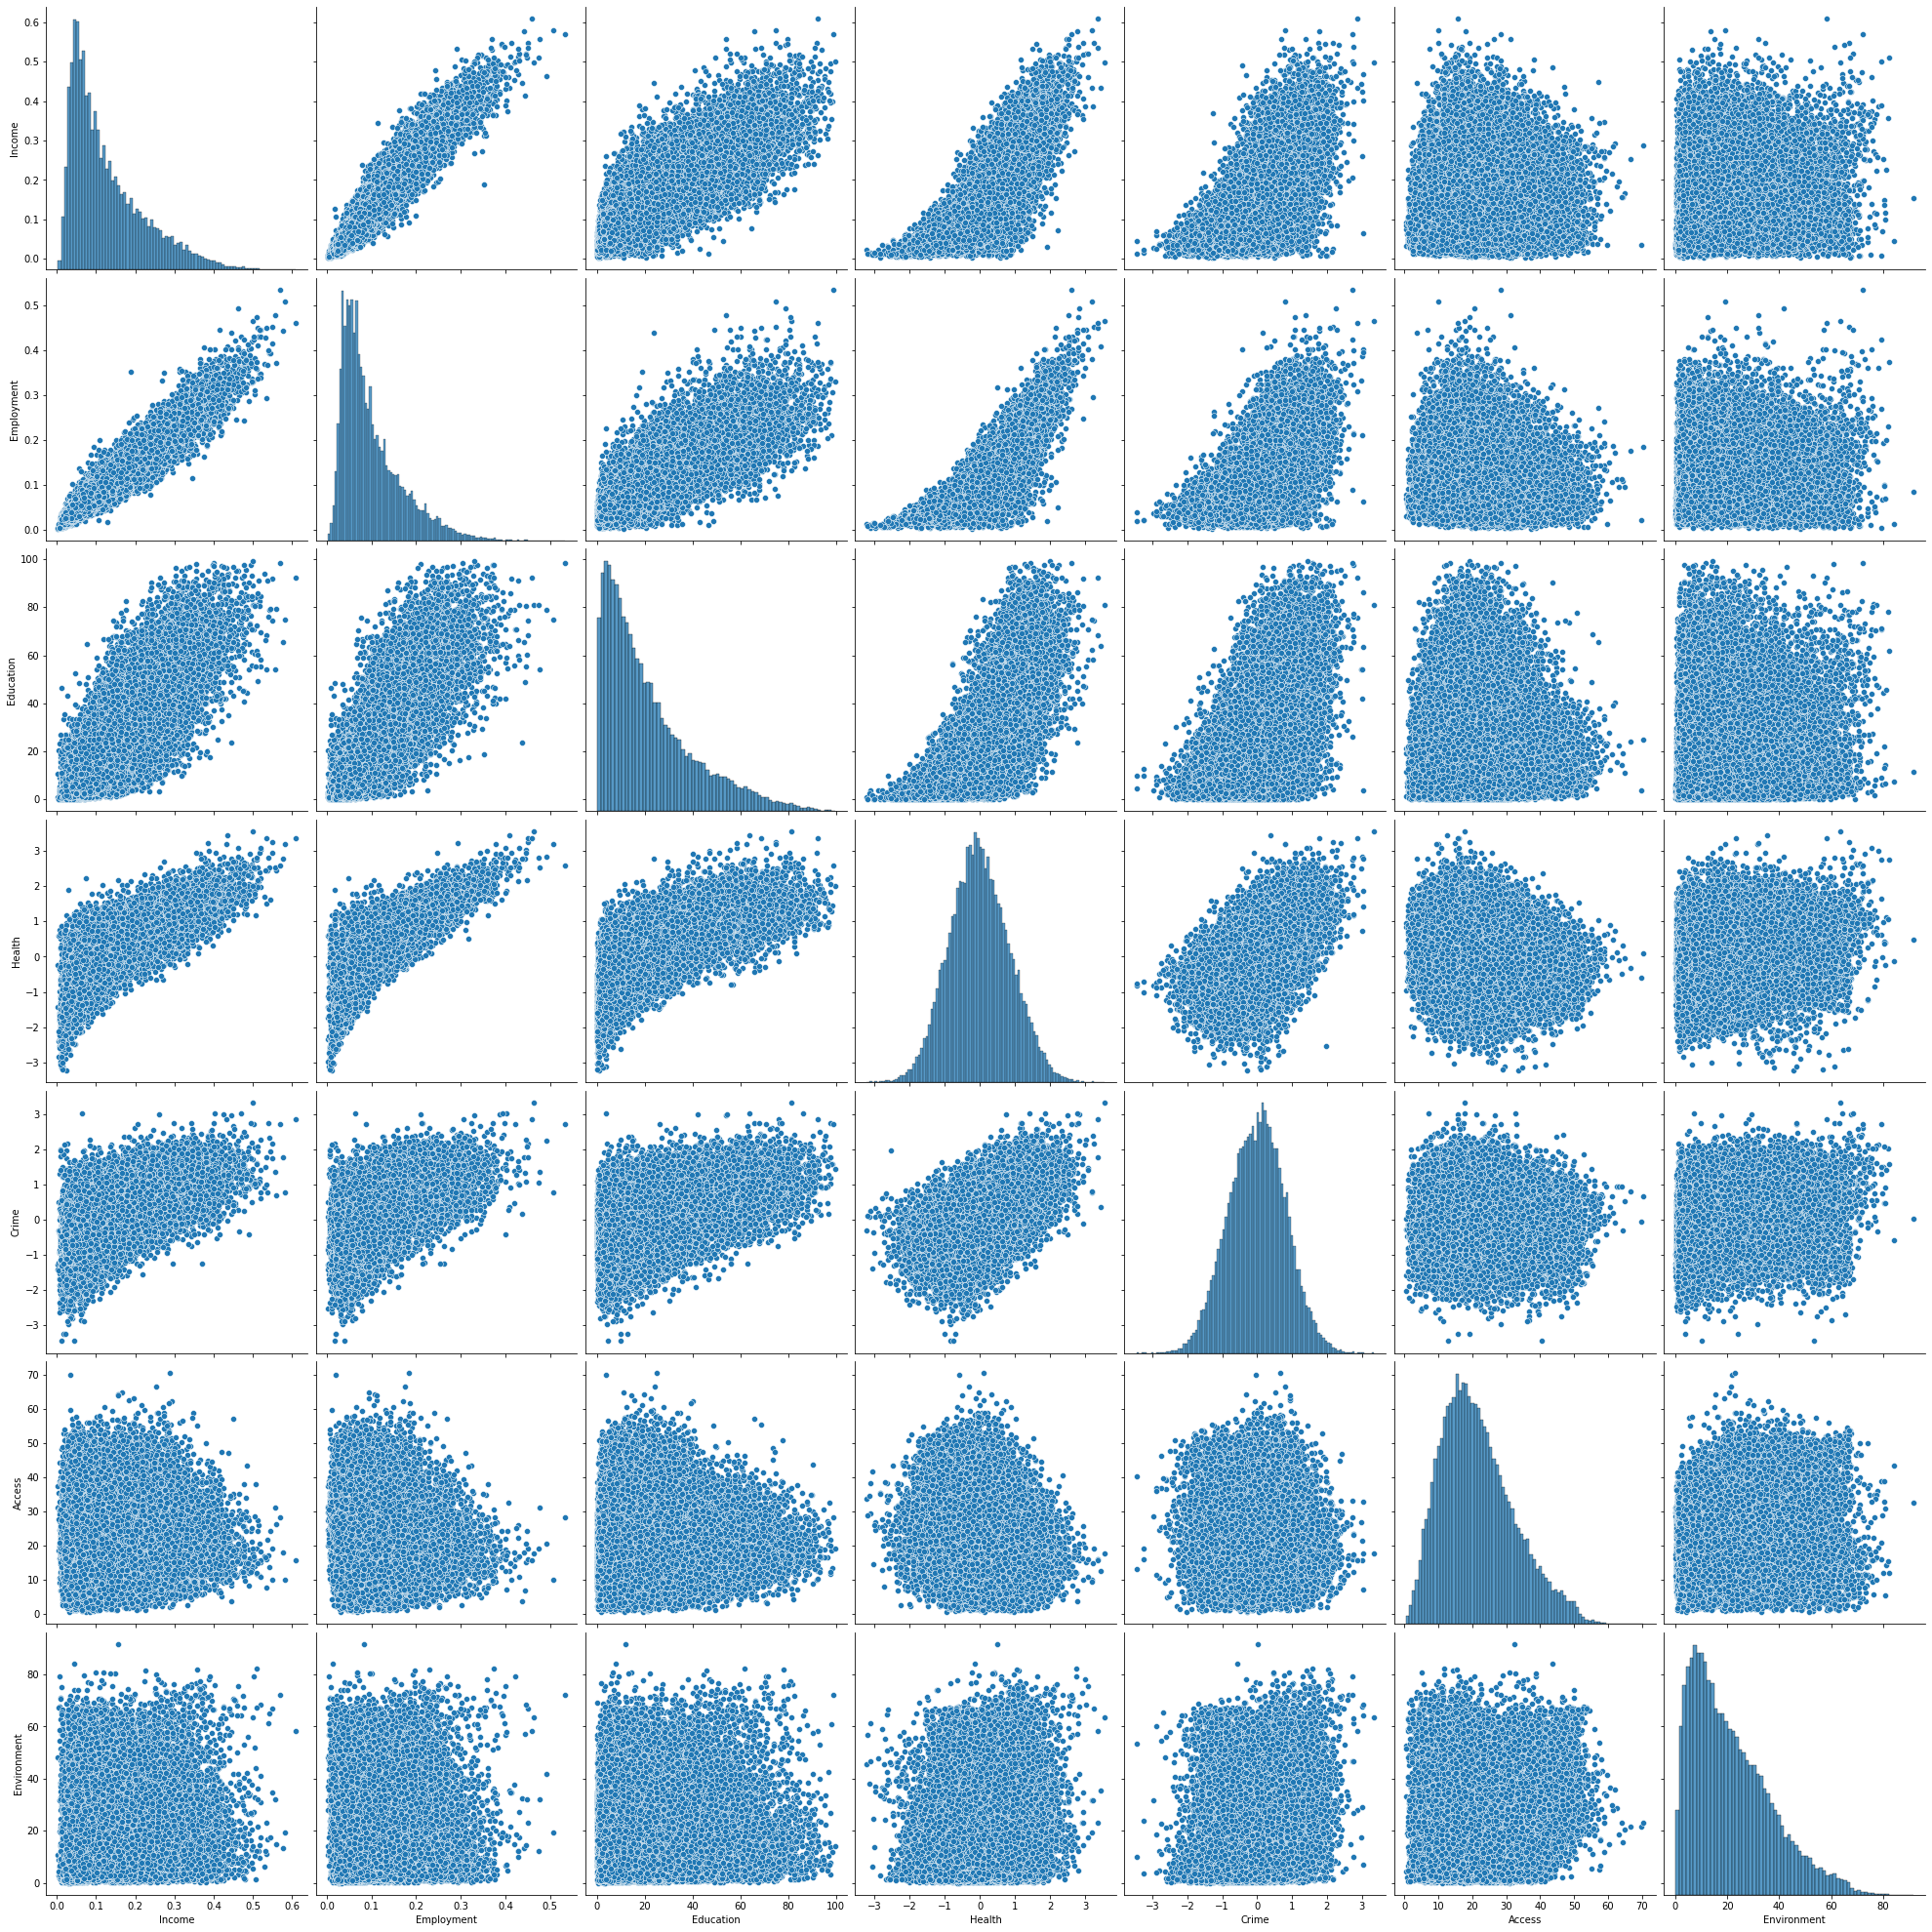

In [37]:
plot_norm = sns.pairplot(to_cluster,height = 4)

In [16]:
normed = to_cluster.copy()
for c in to_cluster.columns.values:
    normed[c] = pts.fit_transform(to_cluster[c].values.reshape(-1,1))
normed.head()

Income  Employment  Education    Health     Crime    Access  \
lsoa11cd                                                                   
E01000001 -2.010227   -2.129371  -2.355455 -1.984624 -2.448024  0.789522   
E01000002 -1.315824   -1.503181  -2.332324 -1.315988 -2.846762  0.375613   
E01000003 -0.299461    0.035907  -0.924606 -0.096220 -1.263032  1.549505   
E01000005  1.089579    0.830507   0.355922 -0.118514 -1.608426  1.536086   
E01000006  0.155695   -0.565768  -0.082912 -0.399991 -0.184938  1.873320   

           Environment  
lsoa11cd                
E01000001     0.798946  
E01000002     0.321986  
E01000003     1.190037  
E01000005     0.652692  
E01000006     0.540922

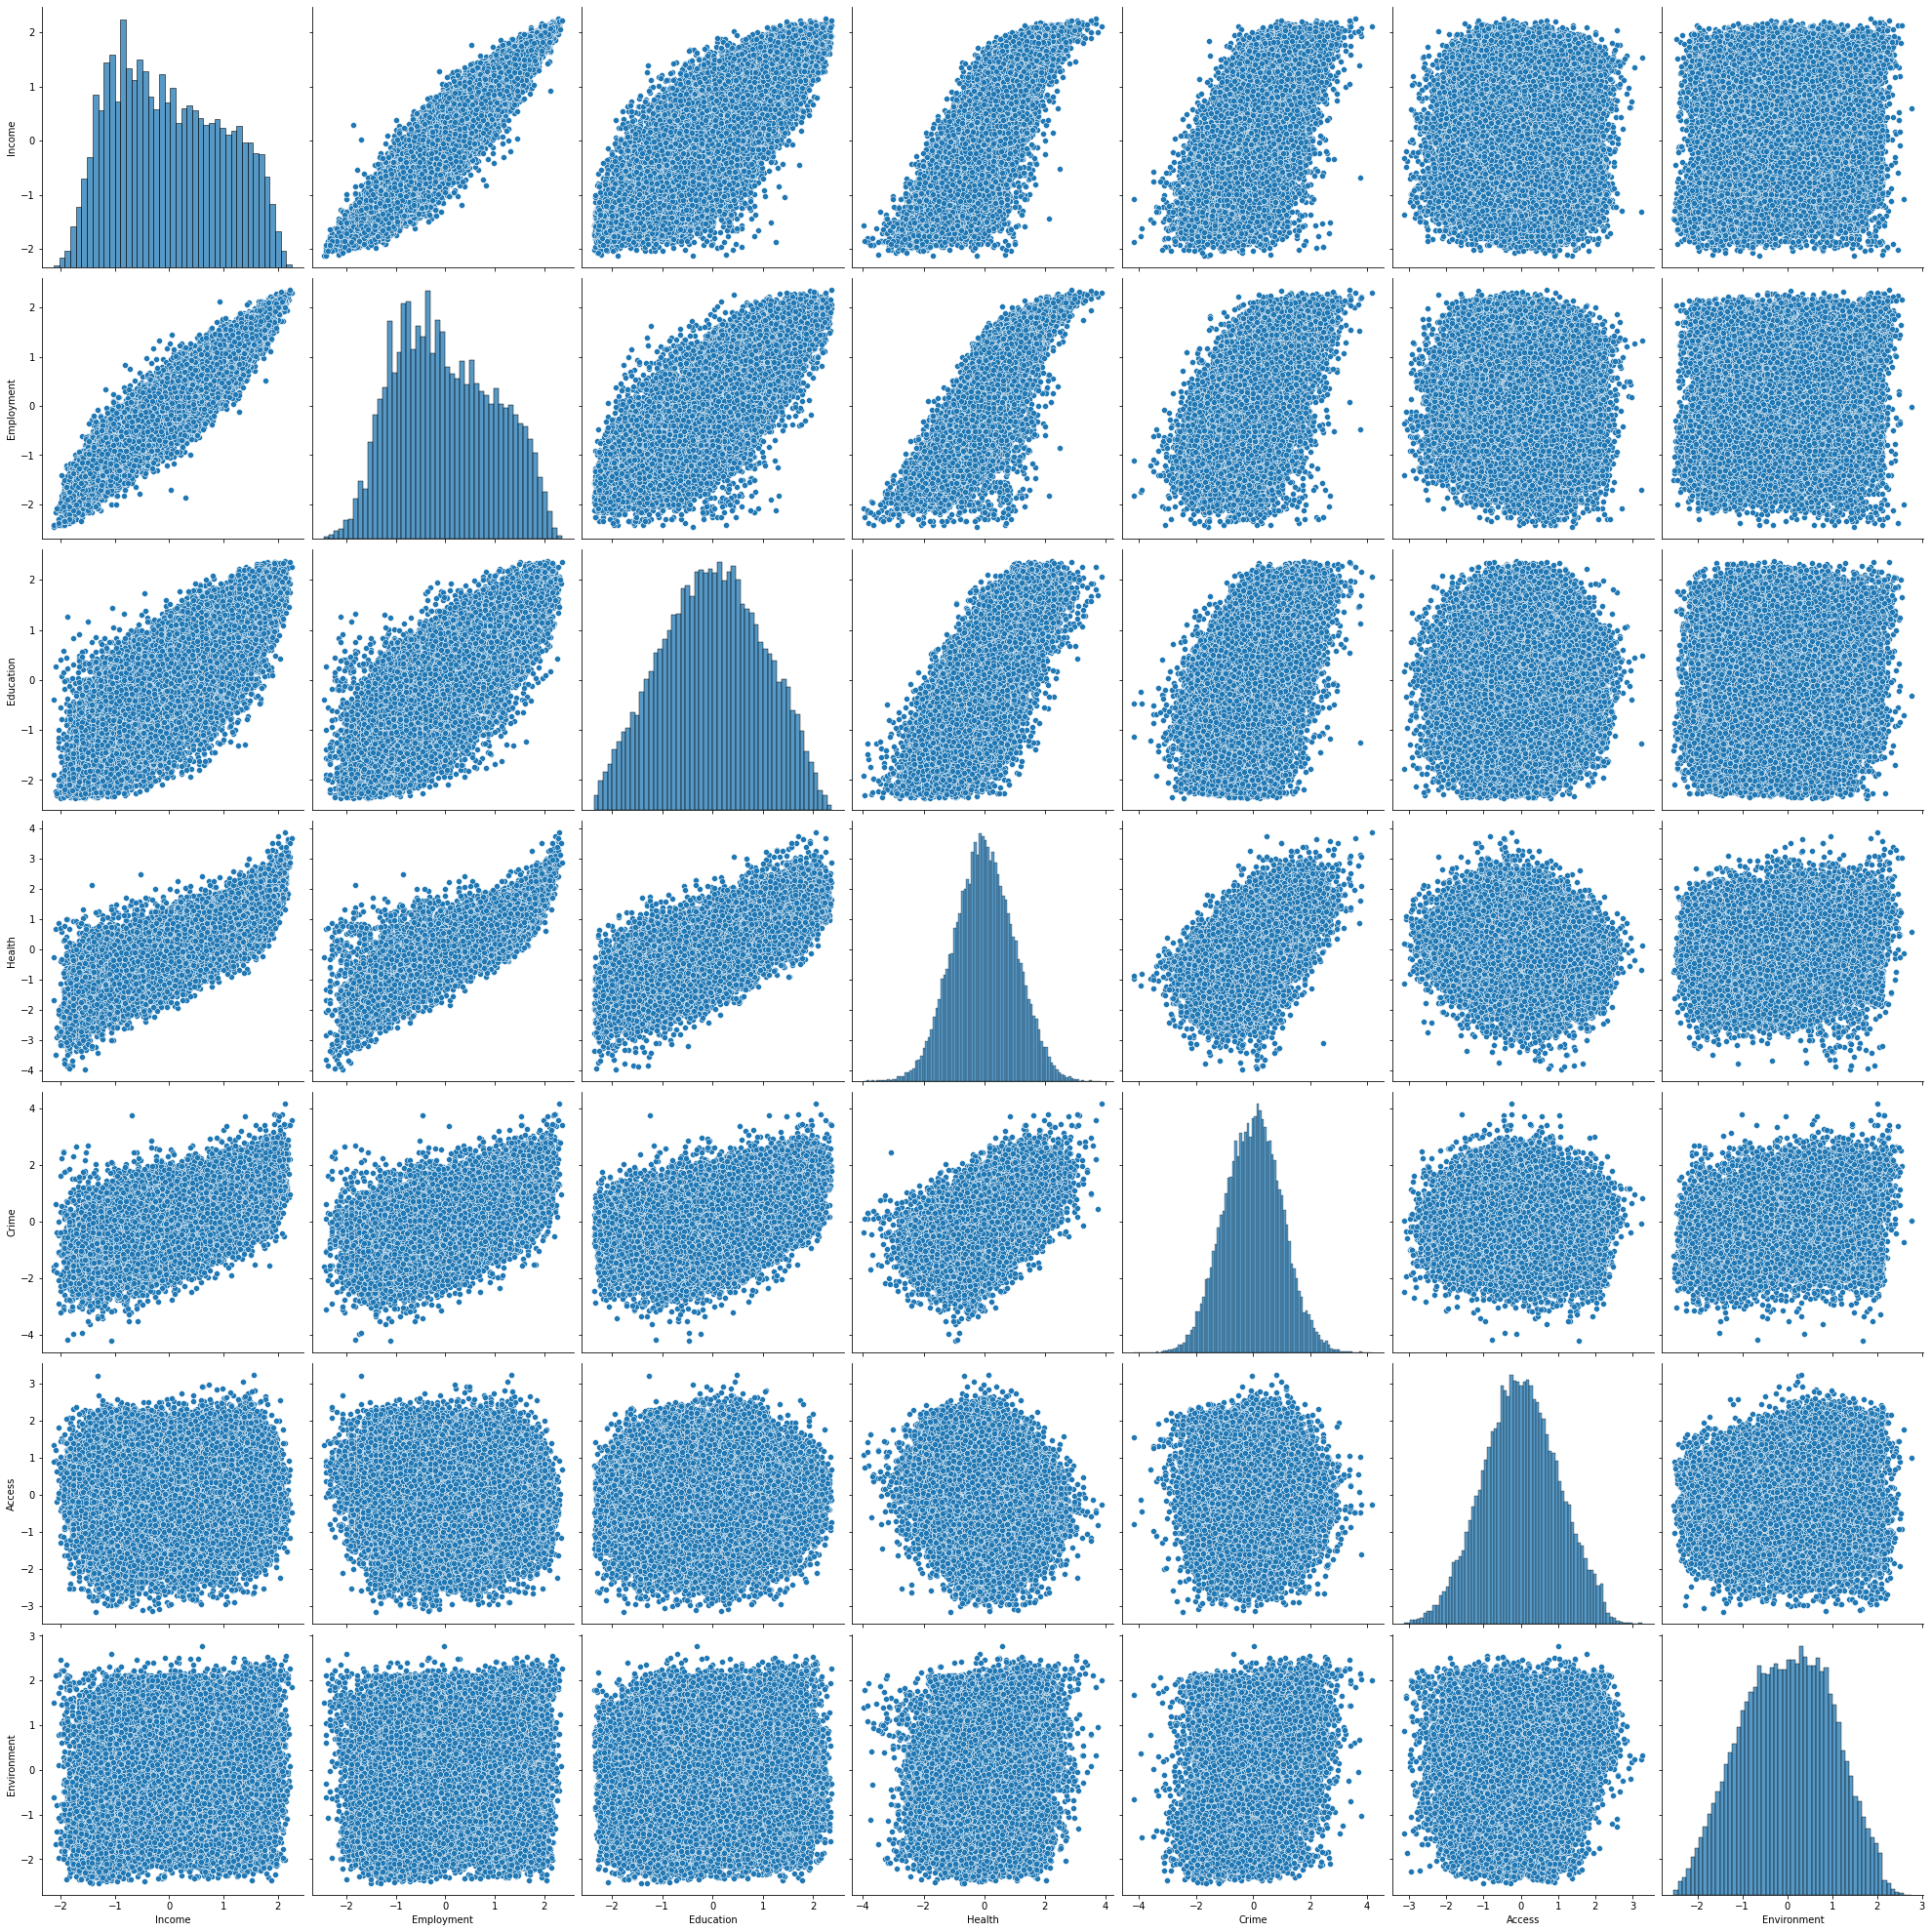

In [39]:
plot_norm = sns.pairplot(normed,height = 4)

In [17]:
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)

normed_pca = pca.fit_transform(normed)
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.57560782 0.17397734 0.11849041 0.06675238 0.03554967 0.02434435
 0.00527802]


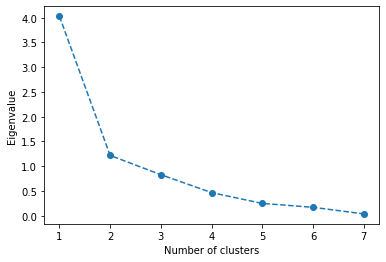

In [18]:
dfpc = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})

plt.plot(dfpc['PC'], dfpc['eigenvalue'], marker='o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('Eigenvalue')
plt.show()

In [19]:
pca = PCA(n_components = 2)

normed_pca = pca.fit_transform(normed)
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.57560782 0.17397734]


In [20]:
list_var = normed.columns.tolist()
print(list_var)

['Income', 'Employment', 'Education', 'Health', 'Crime', 'Access', 'Environment']


In [21]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var)
df_PrincipleComp

Income  Employment  Education    Health     Crime    Access  Environment
0  0.477021    0.475910   0.432208  0.448238  0.373663 -0.020831     0.134835
1 -0.039767    0.079794   0.118447  0.140711 -0.157439 -0.704671    -0.660964

In [22]:
score_pca = pca.transform(normed)
score_pca

array([[-4.70339849, -1.34724006],
       [-3.96911996, -0.55836374],
       [-0.91227993, -1.78789439],
       ...,
       [ 0.43181334,  0.28155554],
       [ 3.91328874, -0.05624038],
       [ 3.33451141, -1.04583669]])

In [23]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.02937744 1.21787845]


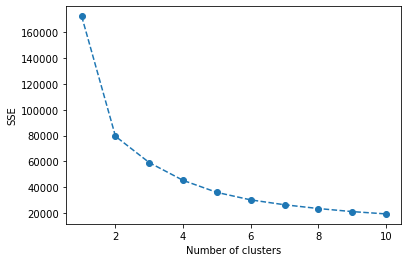

In [24]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='k-means++', random_state=0)
    km.fit(score_pca)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [25]:
k_cluster = 2
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(score_pca)

KMeans(n_clusters=2, random_state=1)

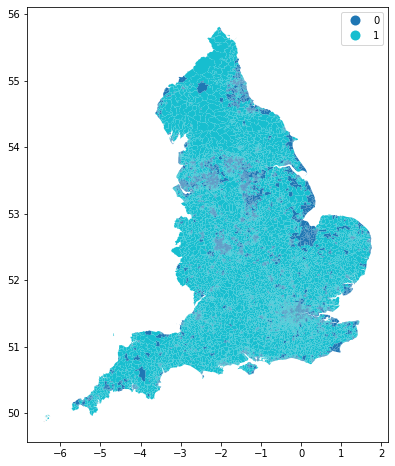

In [35]:
ppd['Kmeans_Cluster'] = kmeans_method.labels_
ppd.plot(column='Kmeans_Cluster', categorical=True, legend=True, figsize=(12,8));

In [27]:
ppd_kpca = pd.concat([ppd.reset_index(drop = True), pd.DataFrame(score_pca)],axis = 1)
ppd_kpca.columns.values[-2: ] = ['Component1','Component2']

In [28]:
ppd_kpca['Segement'] = ppd_kpca['Kmeans_Cluster'].map({0:'First',1:'Second',2:'Third'})

In [29]:
ppd_kpca.head()

lsoa11cd                   lsoa11nm  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            geometry  Income  Employment  \
0  POLYGON ((-0.09726 51.52158, -0.09649 51.52028...   0.007       0.010   
1  POLYGON ((-0.08810 51.51941, -0.08927 51.51752...   0.034       0.027   
2  POLYGON ((-0.09676 51.52325, -0.09644 51.52282...   0.086       0.086   
3  POLYGON ((-0.07320 51.51000, -0.07551 51.50974...   0.211       0.136   
4  POLYGON ((0.09118 51.53909, 0.09328 51.53787, ...   0.117       0.059   

   Education  Health  Crime  Access  Environment  Kmeans_Cluster  Component1  \
0      0.024  -1.654 -2.012  29.472       31.873               1   -4.703398   
1      0.063  -1.115 -2.343  24.412       23.084               1   -3.969120   
2      5.804  -0.102 -1.032  40.103       40.535               1   -0.912280   
3     22.260  -0.121 -1.317  39.900       28.979               0    0.470708   
4     14.798  -0.359 -0.147  45.171       26.888               1   -0.445303   

   Component2 Segement  
0   -1.347240   Second  
1   -0.558364   Second  
2   -1.787894   Second  
3   -1.212190    First  
4   -1.765929   Second

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


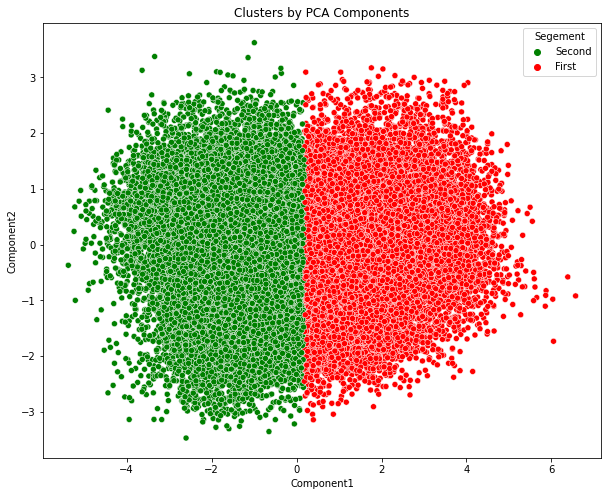

In [30]:
x_axis = ppd_kpca['Component1']
y_axis = ppd_kpca['Component2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis,y_axis,hue = ppd_kpca['Segement'], palette = ['g','r'])
plt.title('Clusters by PCA Components')
plt.show()